In [ ]:
install.packages("chron")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart)
library(ggplot2)
library(dplyr)
library(chron)

In [ ]:
sales <- read.csv("supermarket_sales - Sheet1.csv")
summary(sales)
sales <- sales %>% select(-Invoice.ID, -Branch)

  Invoice.ID           Branch              City           Customer.type     
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    Gender          Product.line         Unit.price       Quantity    
 Length:1000        Length:1000        Min.   :10.08   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:32.88   1st Qu.: 3.00  
 Mode  :character   Mode  :character   Median :55.23   Median : 5.00  
                                       Mean   :55.67   Mean   : 5.51  
                                       3rd Qu.:77.94   3rd Qu.: 8.00  
                                   

In [ ]:
head(sales)

,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax.5.,Total,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
3,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
5,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1


NEW DATA SET!!! gives sales information of a supermarket with three different branches. Wierdly, it didnt give the name of the supermarket in the description.

QUESTIONS:
1.is there a relationship between time of day and what people are buyinh
2.can we predict how much people are going to spend and what day people are going to spend based on whether they are male or female
3.does each gender buy at different times of the day and what do they buy? Can i predict these things
4.is there a relationship between COGS and the payment type?

,TimeRange,sums
,<fct>,<dbl>
1,"(600,660]",29306.40
2,"(660,720]",28616.35
3,"(720,780]",27036.85
4,"(780,840]",31356.25
5,"(840,900]",29136.15
6,"(900,960]",29420.29
7,"(960,1.02e+03]",24025.07
8,"(1.02e+03,1.08e+03]",23821.01
9,"(1.08e+03,1.14e+03]",25006.87


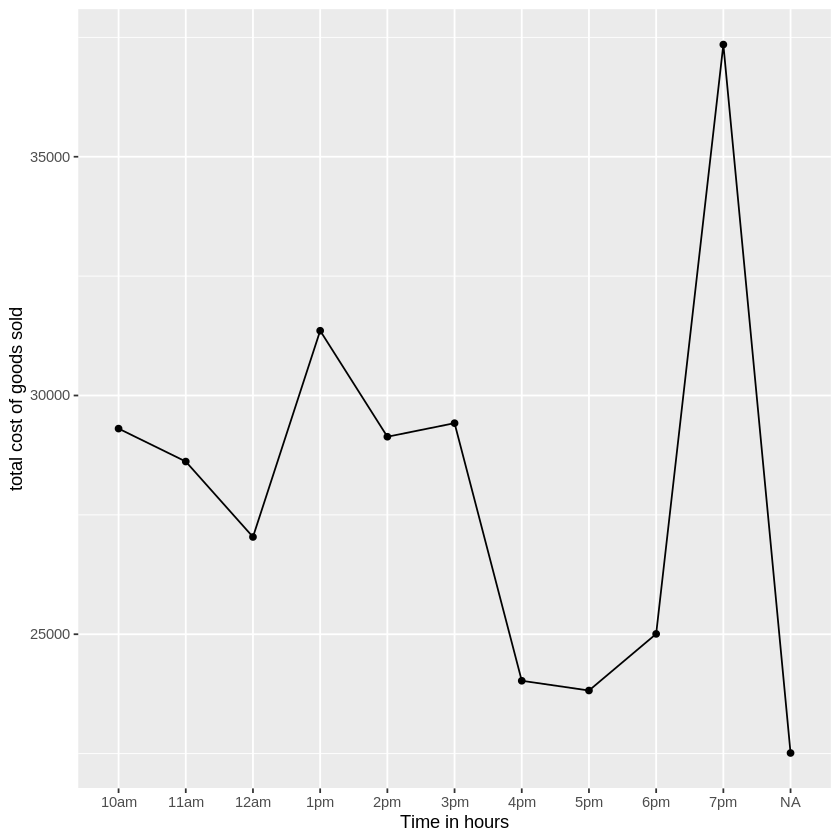

In [ ]:
#https://stackoverflow.com/questions/29067375/convert-hoursminutesseconds-to-minutes
#https://statisticsglobe.com/group-data-frame-rows-range-r
#https://www.statology.org/r-geom_path-each-group-consists-of-only-one-observation/
sales2 <- sales %>% select(Time, cogs)
sales2 <- sales2 %>% mutate(Time1 = paste(Time, ":00")) %>% mutate(TimeSorted = 60 * 24 * as.numeric(times(Time1)))
sales2 <- sales2 %>% select(-Time1, -Time)
sales2 <- sales2 %>% mutate(TimeRange = cut(TimeSorted, seq(600, 1200, 60))) %>% group_by(TimeRange) %>% dplyr::summarize(sums = sum(cogs)) %>% as.data.frame()
head(sales2, 12)
ggplot(sales2, aes(TimeRange, sums, group=1)) + geom_point() + geom_line() + ylab("total cost of goods sold") + scale_x_discrete(name="Time in hours", labels=c("(600,660]" = "10am", "(660,720]" = "11am", "(720,780]" = "12am", "(780,840]" = "1pm","(840,900]" = "2pm","(900,960]" = "3pm","(960,1.02e+03]" = "4pm","(1.02e+03,1.08e+03]" = "5pm","(1.08e+03,1.14e+03]" = "6pm","(1.14e+03,1.2e+03]" = "7pm", "NA" = "8pm"))
#shows that as the day goes own total cost of goods sold decreases so cthis company is more likely to make money in the morning hours and at


_______________________________


In [ ]:
#create a descision tree that predicts the quantity

In [ ]:
sales <- sales %>% select(-Date, -Time)

In [ ]:
set.seed(8675309)

split <- 0.75
rows  <- nrow(sales)

train.entries <- sample(rows, rows*split)

sales.train <- sales[train.entries, ]
sales.valid  <- sales[-train.entries,  ]

In [ ]:
model <- lm(Quantity~ ., data=sales.train)

In [ ]:
summary(model)


Call:
lm(formula = Quantity ~ ., data = sales.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9795 -0.6197 -0.0159  0.5609  3.8816 

Coefficients: (4 not defined because of singularities)
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.128252   0.263315  19.476   <2e-16 ***
CityNaypyitaw                    0.137930   0.115185   1.197    0.232    
CityYangon                       0.117793   0.112117   1.051    0.294    
Customer.typeNormal             -0.078481   0.093119  -0.843    0.400    
GenderMale                       0.057979   0.093626   0.619    0.536    
Product.lineFashion accessories  0.035760   0.159520   0.224    0.823    
Product.lineFood and beverages   0.007189   0.159371   0.045    0.964    
Product.lineHealth and beauty    0.029999   0.163060   0.184    0.854    
Product.lineHome and lifestyle   0.009515   0.162518   0.059    0.953    
Product.lineSports and travel    0.071239   0.159468   0

In [ ]:
sales.train <- sales.train %>%
    mutate(yhat = predict(model, newdata=sales.train)) %>%
    mutate(residual = Quantity - yhat)

sales.valid <- sales.valid %>%
    mutate(yhat = predict(model, newdata=sales.valid)) %>%
    mutate(residual = Quantity - yhat)

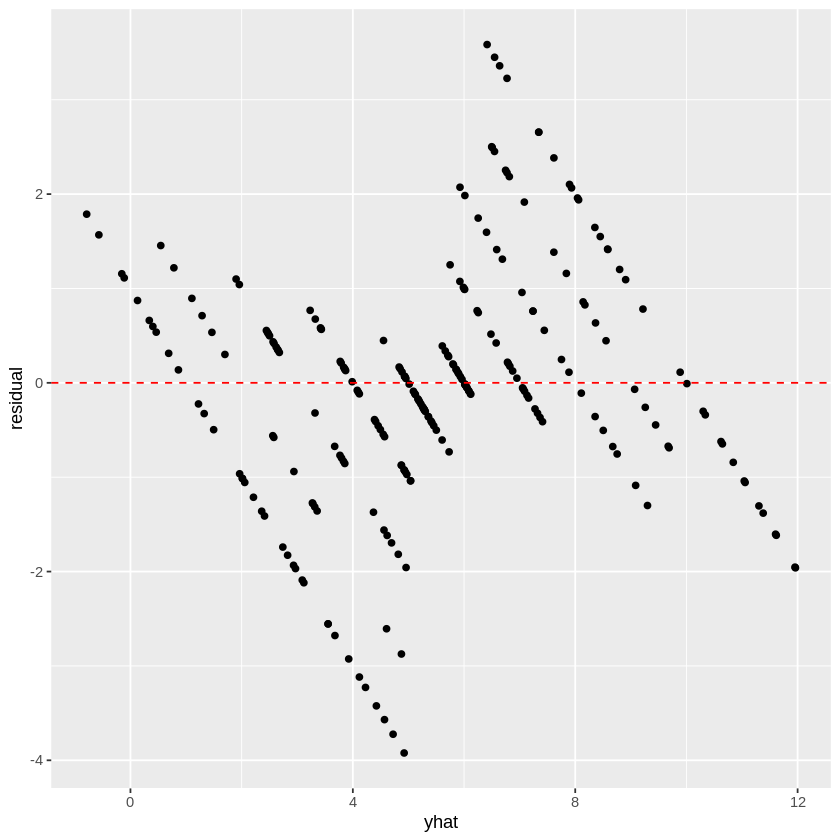

In [ ]:
ggplot(sales.valid) +
  geom_point(aes(x=yhat, y=residual)) +
  geom_hline(aes(yintercept=0), linetype="dashed", color="red")

______________________

In [ ]:
#do a logical regression based on cogs and gender

In [ ]:
sales <- sales %>% mutate(Male = Gender == "Male") %>% select(-Gender)

In [ ]:
set.seed(8675309)

split <- 0.75
rows  <- nrow(sales)

train.entries <- sample(rows, rows*split)

sales.train <- sales[train.entries, ]
sales.valid  <- sales[-train.entries,  ]

In [ ]:
model <- glm(Male ~ ., data=sales.train)

In [ ]:
summary(model)


Call:
glm(formula = Male ~ ., data = sales.train)

Coefficients: (4 not defined because of singularities)
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.450399   0.126612   3.557 0.000399 ***
CityNaypyitaw                   -0.085493   0.045302  -1.887 0.059529 .  
CityYangon                      -0.020009   0.044186  -0.453 0.650795    
Customer.typeNormal              0.016238   0.036689   0.443 0.658198    
Product.lineFashion accessories -0.046116   0.062808  -0.734 0.463040    
Product.lineFood and beverages  -0.022259   0.062765  -0.355 0.722958    
Product.lineHealth and beauty    0.110714   0.064095   1.727 0.084528 .  
Product.lineHome and lifestyle  -0.024948   0.064004  -0.390 0.696803    
Product.lineSports and travel   -0.043590   0.062797  -0.694 0.487811    
Unit.price                       0.002909   0.001463   1.988 0.047217 *  
Quantity                         0.008994   0.014524   0.619 0.535935    
Tax.5

In [ ]:
sales <- sales %>% mutate(phat = predict(model, type='response', newdata=sales))

sales %>% head()

,City,Customer.type,Product.line,Unit.price,Quantity,Tax.5.,Total,Payment,cogs,gross.margin.percentage,gross.income,Rating,Male,phat
,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,FALSE,0.6267054
2,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,FALSE,0.3869368
3,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,TRUE,0.4420163
4,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,TRUE,0.6153731
5,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,TRUE,0.5077105
6,Naypyitaw,Normal,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,4.761905,29.8865,4.1,TRUE,0.4911316


In [ ]:
sales <- sales %>% mutate(prediction = phat > 0.5)

In [ ]:
table(sales$prediction, sales$Male, dnn=c("prediction", "true value"))

          true value
prediction FALSE TRUE
     FALSE   314  270
     TRUE    187  229

In [ ]:
#accuracy = 54%

In [ ]:
sales %>% group_by(Male) %>% summarize(N=n(), null.predict = n()/nrow(sales)*100)

Male,N,null.predict
<lgl>,<int>,<dbl>
FALSE,501,50.1
TRUE,499,49.9
